In [11]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [16]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=2, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = "checkpoints/fully_fledged_meta_learning_4_gpu/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=10, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', '6a', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '4e', 'c6e96', 'c25d29', '03f16302c1a54c46b438dac78e9d7048', '600e', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b

tensor([[-1.2517e-05,  2.3937e-04,  3.4267e-04],
        [ 6.3148e-04,  1.0961e-03,  1.5126e-03],
        [ 8.8468e-04,  1.5633e-03,  2.2631e-03],
        ...,
        [ 9.2935e-03,  8.4923e-03,  8.6576e-03],
        [ 9.9973e-03,  9.9403e-03,  1.0837e-02],
        [ 1.0139e-02,  1.0434e-02,  1.1705e-02]], grad_fn=<AddBackward0>)


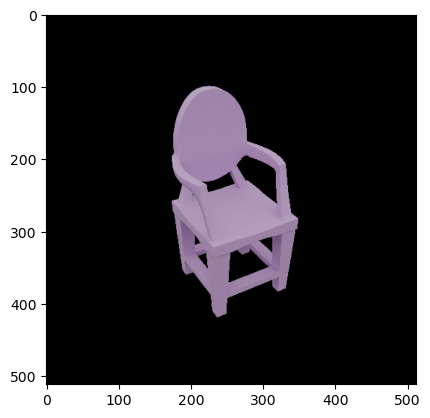

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[6]
print(chairs.train_dataset.get_chair_name_by_idx(6))
coords = get_mgrid(512, 2)
print(pixels)
pixels = pixels * 0.5 + 0.5
# # Pass the coordinates through the model
output = model(coords)
output = output * 0.5 + 0.5
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(512,512,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


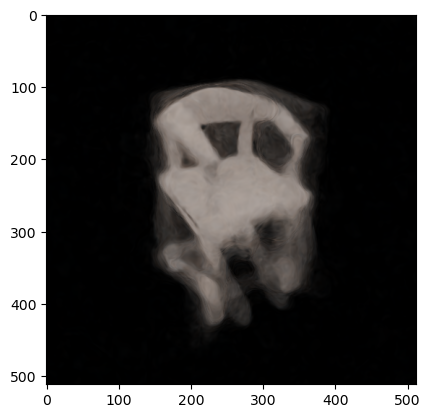

In [18]:
# Output base weights
plt.imshow(output.view(512,512,3).detach().numpy())

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([ 1.3032e-03,  6.0982e-04, -1.6526e-03, -4.6819e-04, -2.0636e-03,
         7.0138e-04,  6.9395e-04,  4.1847e-04, -1.1236e-03,  6.9970e-04,
         1.4941e-04, -1.1270e-03,  1.0802e-03,  1.3578e-03,  8.4064e-04,
         3.9703e-04, -2.3852e-03, -1.6968e-03, -1.2925e-03,  8.5916e-04,
         1.6113e-03, -1.6061e-03,  4.9353e-04, -5.4741e-06, -1.4456e-03,
        -1.6821e-03,  8.9534e-04,  1.7173e-03, -3.0071e-04,  7.7720e-04,
         8.7998e-04, -1.3265e-03,  4.9984e-04, -8.1385e-04,  8.3204e-04,
         7.4247e-04, -1.4914e-03, -7.5971e-04,  1.5525e-04, -6.3194e-04,
         1.3480e-03,  1.5459e-04,  1.9171e-04, -1.1180e-03,  1.7749e-03,
        -2.5236e-04, -1.3043e-03, -3.8907e-04, -1.3196e-03,  1.2963e-03,
        -3.1266e-04, -5.9618e-04,  9.1278e-04,  8.8339e-04, -4.8500e-04,
         1.2322e-03, -1.7101e-03, -8.2773e-04, -5.6681e-04, -5.8741e-04,
        -8.1547e-04, -1.8013e-03, -8.2362e-04, -2.0471e-03,  5.9434e-04,
       

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:14<00:28, 14.49s/it]

END PHI: Parameter containing:
tensor([-1.4877e-03, -6.2088e-04,  1.5768e-03,  5.3682e-04,  2.2749e-03,
        -1.4174e-04, -6.8602e-04, -4.3319e-04,  7.1886e-04, -4.8877e-04,
         4.0912e-05,  1.1028e-03, -8.9815e-04, -1.6505e-03, -6.5466e-04,
        -4.0539e-04,  2.1166e-03,  1.6324e-03,  7.4242e-04, -9.5128e-04,
        -1.3205e-03,  1.0158e-03, -4.9592e-04,  5.0599e-04,  1.8692e-03,
         1.7555e-03, -8.4554e-04, -1.3497e-03,  6.2696e-04, -1.0681e-03,
        -8.3039e-04,  1.2050e-03, -3.5271e-04,  4.4982e-04, -6.9782e-04,
        -4.9211e-04,  8.7962e-04,  5.4097e-04, -6.8808e-04,  1.0545e-03,
        -1.4776e-03,  4.0614e-04, -3.8568e-04,  1.5543e-03, -1.7940e-03,
         7.6493e-04,  1.2074e-03,  3.1321e-04,  1.2825e-03, -1.1035e-03,
         6.0551e-04,  2.2768e-04, -4.2947e-04, -6.0202e-04,  5.9456e-04,
        -1.1290e-03,  1.6642e-03,  9.6013e-04,  4.3586e-04,  8.6899e-04,
         8.4395e-04,  1.6216e-03,  5.7064e-04,  1.7008e-03, -3.1174e-04,
        -4.6042e-04,

 67%|██████▋   | 2/3 [00:28<00:14, 14.39s/it]

END PHI: Parameter containing:
tensor([-2.8378e-04, -3.0303e-04,  4.8129e-04,  1.4938e-04,  8.6833e-04,
         1.7573e-04, -1.6099e-04, -4.3742e-04, -7.7433e-08,  9.8532e-06,
        -2.8673e-04,  1.4800e-04, -5.5217e-05, -6.4020e-04, -3.3632e-04,
         9.6582e-06,  5.4883e-04,  3.4447e-04,  9.1336e-05, -1.9276e-04,
        -4.3893e-04,  2.5181e-06, -1.7095e-04,  1.5406e-04,  4.2612e-04,
         3.8640e-04, -1.1177e-04, -4.4561e-04,  1.4174e-04, -4.7542e-04,
        -4.5425e-04,  2.6136e-04,  9.5696e-05,  1.3985e-04, -3.1969e-04,
         1.7420e-05,  5.2656e-05,  8.5154e-05, -4.4300e-04,  3.1023e-04,
        -5.0140e-04,  3.2274e-04, -2.1315e-04,  5.6309e-04, -2.9291e-04,
         4.5175e-04,  1.5165e-04,  7.8903e-06,  4.3636e-04, -3.5364e-04,
         3.4019e-04,  1.4353e-04,  3.5752e-05, -3.2718e-06, -2.1839e-05,
        -3.9158e-04,  5.2938e-04,  3.4247e-04,  1.9227e-04,  2.7129e-04,
         1.5146e-04,  7.2905e-04,  1.8428e-04,  2.8401e-04, -1.4790e-04,
        -2.0378e-04,

100%|██████████| 3/3 [00:42<00:00, 14.33s/it]

END PHI: Parameter containing:
tensor([-1.2545e-03, -6.8469e-04,  1.5370e-03,  5.0819e-04,  2.3377e-03,
         1.5924e-04, -5.9965e-04, -7.2491e-04,  3.8800e-04, -3.1077e-04,
        -2.9540e-04,  7.8582e-04, -6.0934e-04, -1.7343e-03, -7.6859e-04,
        -2.5620e-04,  1.8879e-03,  1.3781e-03,  5.1654e-04, -8.3738e-04,
        -1.2812e-03,  6.4366e-04, -5.0557e-04,  5.2978e-04,  1.6586e-03,
         1.5910e-03, -5.9415e-04, -1.3524e-03,  5.5840e-04, -1.1764e-03,
        -1.0336e-03,  1.0422e-03, -7.8010e-05,  5.0399e-04, -7.6120e-04,
        -2.6613e-04,  5.2166e-04,  4.4736e-04, -8.7956e-04,  1.0033e-03,
        -1.5367e-03,  6.1667e-04, -5.3871e-04,  1.5534e-03, -1.4239e-03,
         1.0099e-03,  9.3080e-04,  1.3493e-04,  1.2293e-03, -1.1139e-03,
         7.0085e-04,  3.2483e-04, -2.7053e-04, -4.1618e-04,  4.0849e-04,
        -1.1511e-03,  1.6426e-03,  1.0554e-03,  4.5055e-04,  8.7110e-04,
         7.1555e-04,  1.8112e-03,  5.8067e-04,  1.3417e-03, -3.8820e-04,
        -4.9975e-04,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 0.0039,  0.0040,  0.0042],
        [ 0.0055,  0.0056,  0.0060],
        [ 0.0068,  0.0069,  0.0073],
        ...,
        [-0.0027, -0.0014, -0.0007],
        [-0.0022, -0.0029, -0.0026],
        [-0.0014, -0.0037, -0.0041]], grad_fn=<AddBackward0>)
torch.Size([262144, 3])


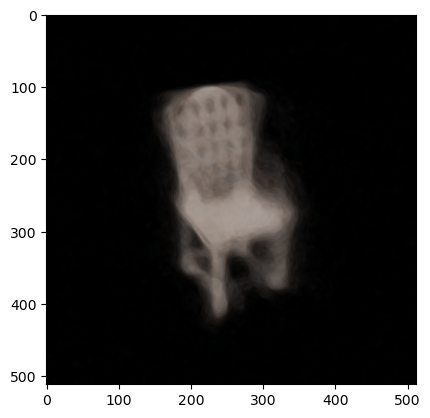

In [19]:
batch = chairs.train_dataset[6]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(512, 2)

output = model(coords)
output = output * 0.5 + 0.5
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())

plt.show()
